In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy  as np
import matplotlib.pyplot as plt
import skimage.io

from saliency import saliency

# Visual Saliency

This is a re-implementation of the functions provided in the template

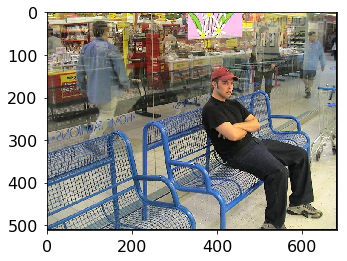

In [23]:
gt  = skimage.io.imread('data/imgs/d67.jpg')
img = skimage.io.imread('data/imgs/67.jpg') / 255.
plt.imshow(img)
plt.show()

/usr/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


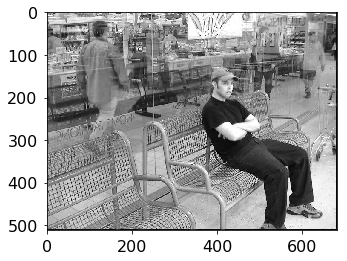

In [26]:
import skimage.color

refcolor = np.array([1,0,0])

img_hsv  = skimage.color.rgb2hsv(img)
refcolor = skimage.color.rgb2hsv(refcolor.reshape(1,1,3)) # to make it compatible

plt.imshow(img_hsv[...,2], cmap="gray")

processing
[ 0.17293782  0.18409413  0.07697556  0.20685423  0.12583709  0.14061819
  0.08144078  0.26672094  0.13969368  0.18468229  0.07413437  0.28486917
  0.27763128  0.1694493   0.0661817   0.20548588  0.20037633  0.17110572
  0.08443308  0.34594325  0.3050573   0.15055003  0.07715723  0.15513268
  0.1750401   0.50209267  0.09935872  0.29319084]


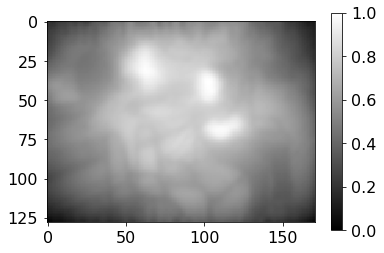

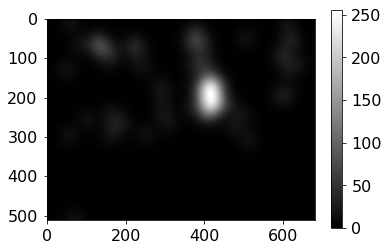

In [27]:
from saliency.model import IttyKoch

model = IttyKoch(top_down="peakiness", mapwidth=128, logtransform=False,
                 surround_sig = [2,8],
                 gabor_wavelength=5.,
                 center_bias=1.5)

final_map, chanmaps = model.predict(img, return_chanmaps=True)

plt.imshow(final_map, cmap="gray")
plt.colorbar()
plt.show()

plt.imshow(gt, cmap="gray")
plt.colorbar()
plt.show()

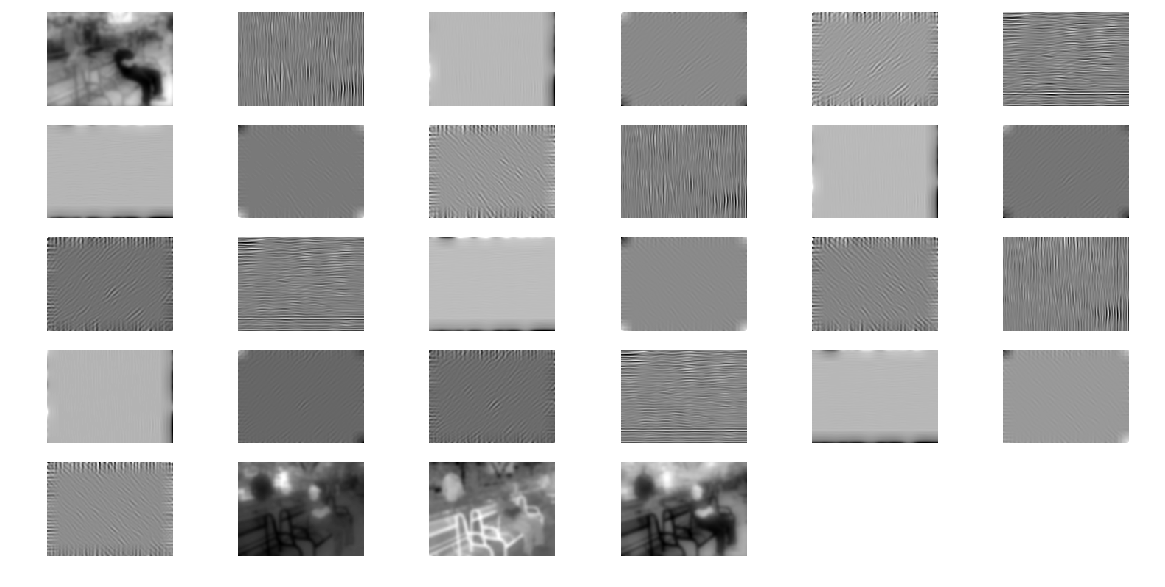

In [29]:
fig, axes = plt.subplots(5,6,figsize=(20,10))
axes = axes.flatten()



for i, ax in enumerate(axes[:chanmaps.shape[-1]]):
    ax.imshow(chanmaps[...,i], cmap="gray")

for ax in axes:
    ax.grid("off")
    ax.axis("off")
    
    
plt.show()